<a href="https://colab.research.google.com/github/lluisdn/TFM/blob/main/ModelCalibrationMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**General libraries**

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

#**TensorFlow**

In [ ]:
# TensorFlow
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.models import Model

#Sklearn
from sklearn.model_selection import train_test_split

In [ ]:
#MNIST dataset
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test)  = keras.datasets.mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33)

#Pre-processing
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

In [ ]:
#x_train / x_test / x_val reshape
x_train_2 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_2 = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val_2 = x_val.reshape(x_val.shape[0], 28, 28, 1)


#Hot encoded array:
def target_matrix(target):
    target_matrix=np.zeros((len(target),10))
    target_matrix[np.arange(target.size),target ] = 1
    return target_matrix

#New arrays
y_train_2 = target_matrix(y_train)
y_test_2 = target_matrix(y_test)
y_val_2 = target_matrix(y_val)

#**Model**

#*LeNet (CNN)*

In [ ]:
# Input layer
input_data = Input(shape=(28, 28, 1))

# Convolutional layer
layer_1 = Conv2D(6, kernel_size=(5, 5), activation='sigmoid', padding='same')(input_data) #same /valid

# Max Pooling
layer_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(layer_1)

# Convolutional layer
layer_3 = Conv2D(16, kernel_size=(5, 5), activation='sigmoid')(layer_2)

# Max Pooling
layer_4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(layer_3)

# Flatten the data
layer_5 = Flatten()(layer_4)

# Fully Connected Layers
layer_6 = Dense(120, activation='sigmoid')(layer_5)
layer_7 = Dense(84, activation='sigmoid')(layer_6)
output = Dense(10, activation='softmax')(layer_7)

# Compile the model
lenet = Model(inputs=input_data, outputs=output)
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Plot the model
lenet.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0   

In [ ]:
#Fitting
lenet.fit(x_train_2, y_train_2,
                epochs=5,
                shuffle=True,
                )

Epoch 1/5
1257/1257 [==============================] - 28s 22ms/step - loss: 0.0631 - accuracy: 0.9803
Epoch 2/5
1257/1257 [==============================] - 28s 23ms/step - loss: 0.0529 - accuracy: 0.9842
Epoch 3/5
1257/1257 [==============================] - 29s 23ms/step - loss: 0.0457 - accuracy: 0.9860
Epoch 4/5
1257/1257 [==============================] - 31s 25ms/step - loss: 0.0394 - accuracy: 0.9882
Epoch 5/5
1257/1257 [==============================] - 28s 22ms/step - loss: 0.0343 - accuracy: 0.9896


In [ ]:
# Probabilities
probs_lenet_test=lenet.predict(x_test_2)
probs_lenet_val=lenet.predict(x_val_2)

619/619 [==============================] - 7s 11ms/step


#*Standard model (dense, 784-100-10)*


In [ ]:
# Input layer
input_data_basic = Input(shape=(28, 28, 1))

#Flatten layer
layer_0 = Flatten()(input_data_basic)

#First layer
layer_1 = Dense(100, activation='relu')(layer_0)

#Second layer
layer_2 = Dense(100, activation='relu')(layer_1)

#Output layer
output = Dense(10, activation='softmax')(layer_2)

# Compile the model
basic = Model(inputs=input_data_basic, outputs=output)
basic.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Plot the model
basic.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting
basic.fit(x_train_2, y_train_2,
                epochs=5,
                shuffle=True,
                )

Epoch 1/5
1257/1257 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.9155
Epoch 2/5
1257/1257 [==============================] - 5s 4ms/step - loss: 0.1252 - accuracy: 0.9623
Epoch 3/5
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0848 - accuracy: 0.9733
Epoch 4/5
1257/1257 [==============================] - 4s 3ms/step - loss: 0.0627 - accuracy: 0.9800
Epoch 5/5
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0479 - accuracy: 0.9838


In [ ]:
# Probabilities
probs_basic_test=basic.predict(x_test_2)
probs_basic_val=basic.predict(x_val_2)

619/619 [==============================] - 1s 2ms/step


#**Calibration function**

In [ ]:
def pre_calibration(probs, labels):
  probs_array=[]
  labels_array=[]
  for i in range(len(probs)):
    for j in range(len(probs[0])):
      probs_array.append(probs[i][j])
      labels_array.append(labels[i][j])   #HOT ENCODED ARRAY!!!!!!!!!!!!!!!
  return probs_array, labels_array

In [ ]:
def ModelCalibration(Model, y_prob, y_true):
  # y_true: true labels, y_prob: predicted probabilities
  n_bins = 50  # number of bins
  bin_size = 1 / n_bins  # size of each bin

  bins = np.linspace(0, 1, n_bins+1)  # define the bin edges
  bin_centers = np.linspace(bin_size/2, 1-bin_size/2, n_bins)  # define the bin centers

  # Compute the mean predicted probability and the true frequency for each bin
  mean_predicted_value = []
  fraction_of_positives = []

  for bin_start, bin_end in zip(bins[:-1], bins[1:]):
      idx = (y_prob >= bin_start) & (y_prob < bin_end)  # indices of the examples in the current bin
      result = [y_prob[i] for i in range(len(y_prob)) if idx[i]]
      #print(result)
      true = [y_true[i] for i in range(len(y_prob)) if idx[i]]
      #print(true)
      #print()
      if np.sum(idx) == 0:  # if there are no examples in the bin, skip it
          continue

      mean_predicted_value.append(np.mean(result))          # mean predicted probability for the current bin

      fraction_of_positives.append(np.sum(true)/np.sum(idx))      #np.sum(y_true[idx]) / np.sum(idx))  # true frequency for the current bin
      #print(bin_start, bin_end)
      #print(len(true))
      #print(np.sum(idx))
      #print(fraction_of_positives)


  # Plot the reliability diagram
  fig, ax = plt.subplots()
  ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
  ax.plot(mean_predicted_value, fraction_of_positives, ".")
  ax.set_xlabel('Mean predicted value')
  ax.set_ylabel('Fraction of positives')
  ax.set_title('Calibration Check')
  plt.show()


#*Calibration LeNet*


amount of data 19800


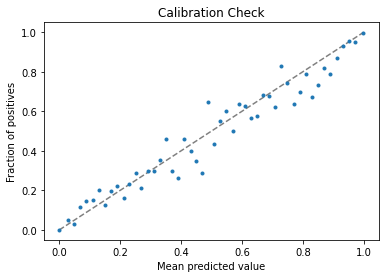

amount of data 10000


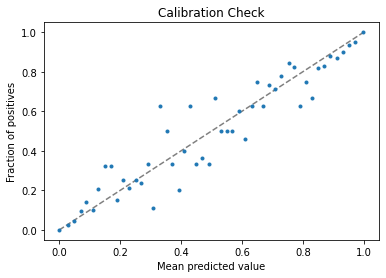

In [ ]:
print('Amount of data', len(probs_lenet_val))
probs_lenet_array, y_test_array = pre_calibration(probs_lenet_val, y_val_2)
ModelCalibration(lenet, probs_lenet_array, y_test_array)

print('amount of data', len(probs_lenet_test))
probs_lenet_array_test, y_test_array_test = pre_calibration(probs_lenet_test, y_test_2)
ModelCalibration(lenet, probs_lenet_array_test, y_test_array_test)

#*Calibration Basic*

Amount of data 19800


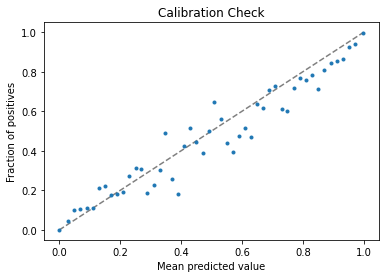

amount of data 10000


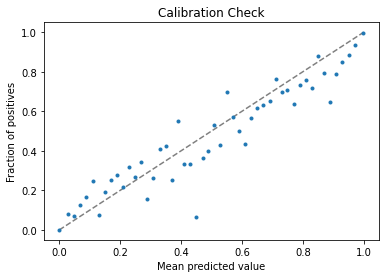

In [ ]:
print('Amount of data', len(probs_basic_val))
probs_basic_array, y_test_array = pre_calibration(probs_basic_val, y_val_2)
ModelCalibration(basic, probs_basic_array, y_test_array)

print('amount of data', len(probs_basic_test))
probs_basic_array_test, y_test_array_test = pre_calibration(probs_basic_test, y_test_2)
ModelCalibration(basic, probs_basic_array_test, y_test_array_test)

In [ ]:
print('Difference between the 2 arrays:')
print(probs_lenet_array[0:10])
print(probs_basic_array[0:10])

Difference between the 2 arrays:
[0.00029808338, 0.0030254168, 0.17609397, 0.0007472071, 0.0070431656, 0.00011206284, 4.1468493e-06, 0.8081844, 0.0006808129, 0.0038107052]
[0.13417841, 5.9837977e-05, 0.18522629, 0.0001650745, 6.5373893e-06, 0.003294047, 9.191152e-07, 0.6652848, 0.0007039612, 0.01108031]
